In [78]:
pip install pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


#### Challange💪 01
- A clean dataset. This means converting the columns to the correct data type, dealing with missing values ...


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [114]:
# Load the dataset
df = pd.read_csv('plants_and_bees.csv')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       1250 non-null   int64  
 1   bees_num        1250 non-null   int64  
 2   date            1250 non-null   object 
 3   season          1250 non-null   object 
 4   site            1250 non-null   object 
 5   native_or_non   1250 non-null   object 
 6   sampling        1250 non-null   object 
 7   plant_species   1250 non-null   object 
 8   time            1250 non-null   int64  
 9   bee_species     1250 non-null   object 
 10  sex             1250 non-null   object 
 11  specialized_on  7 non-null      object 
 12  parasitic       1187 non-null   float64
 13  nesting         1196 non-null   object 
 14  status          15 non-null     object 
 15  nonnative_bee   1189 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 156.4+ KB


In [116]:
# Convert 'date' column to datetime data type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [117]:
# Convert 'season' and 'native_or_non' columns to categorical data type
df['season'] = df['season'].astype('category')
df['native_or_non'] = df['native_or_non'].astype('category')

In [118]:
# Fill missing values in 'specialized_on', 'parasitic', 'nesting', 'status', and 'nonnative_bee' columns
df['specialized_on'].fillna('', inplace=True)  # Assuming an empty string is a suitable placeholder
df['parasitic'].fillna(0, inplace=True)  # Assuming 0 is a suitable placeholder for the 'parasitic' column
df['nesting'].fillna('', inplace=True)  # Assuming an empty string is a suitable placeholder
df['status'].fillna('', inplace=True)  # Assuming an empty string is a suitable placeholder
df['nonnative_bee'].fillna(0, inplace=True)  # Assuming 0 is a suitable placeholder for the 'nonnative_bee' column

In [119]:
# Print information about the cleaned dataset
print(df.head())

   sample_id  bees_num       date        season site native_or_non   sampling  \
0      17400        23 2017-04-18  early.season    A        native  pan traps   
1      17400        23 2017-04-18  early.season    A        native  pan traps   
2      17400        23 2017-04-18  early.season    A        native  pan traps   
3      17400        23 2017-04-18  early.season    A        native  pan traps   
4      17400        23 2017-04-18  early.season    A        native  pan traps   

  plant_species  time           bee_species sex specialized_on  parasitic  \
0          None   935  Augochlorella aurata   f                       0.0   
1          None   935   Agapostemon texanus   f                       0.0   
2          None   935  Augochlorella aurata   f                       0.0   
3          None   935       Andrena carlini   f                       0.0   
4          None   935      Andrena perplexa   m                       0.0   

  nesting status  nonnative_bee  
0  ground       

In [120]:
# Remove rows where 'plant_species' is 'None'
df = df[df['plant_species'] != 'None']

In [121]:
df

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
87,17406,1,2017-04-18,early.season,C,non-native,hand netting,Trifolium incarnatum,1320,Apis mellifera,f,,0.0,hive,,1.0
88,17406,2,2017-04-18,early.season,C,non-native,hand netting,Viola cornuta,1320,Lasioglossum cressonii,f,,0.0,wood,,0.0
89,17406,2,2017-04-18,early.season,C,non-native,hand netting,Viola cornuta,1320,Ceratina calcarata,f,,0.0,wood,,0.0
106,17409,1,2017-05-02,early.season,A,non-native,hand netting,Trifolium repens,1340,Halictus parallelus,f,,0.0,ground,,0.0
107,17409,10,2017-05-02,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Halictus poeyi/ligatus,f,,0.0,ground,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,2017-08-02,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,,0.0,ground,,0.0
1246,17481,11,2017-08-02,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,,0.0,ground,,0.0
1247,17481,11,2017-08-02,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,,0.0,ground,,0.0
1248,17481,11,2017-08-02,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,,0.0,ground,,0.0


#### Challange💪 02
- Which plants are preferred by native vs non-native bee species? To determine which plants are preferred by native and non-native bees, use a machine learning algorithm by choice.


In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [126]:
# Encode categorical variables
le = LabelEncoder()
df['season_encoded'] = le.fit_transform(df['season'])
df['native_or_non_encoded'] = le.fit_transform(df['native_or_non'])
df['plant_species_encoded'] = le.fit_transform(df['plant_species'])
df['specialized_on_encoded'] = le.fit_transform(df['specialized_on'])

In [127]:
# Define features and target variable
features = ['season_encoded', 'native_or_non_encoded', 'plant_species_encoded', 'specialized_on_encoded']
target = 'nonnative_bee'  # 1 for non-native bee, 0 for native bee

In [128]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


In [129]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [130]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [131]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

c:\Users\AhMed_RaFiQ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AhMed_RaFiQ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AhMed_RaFiQ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9883720930232558
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        85
         1.0       0.00      0.00      0.00         1

    accuracy                           0.99        86
   macro avg       0.49      0.50      0.50        86
weighted avg       0.98      0.99      0.98        86



In [136]:
# Feature importance
feature_importances = pd.Series(rf_classifier.feature_importances_, index=features)
print("Feature Importances:\n", feature_importances)



Feature Importances:
 season_encoded            0.208278
native_or_non_encoded     0.081467
plant_species_encoded     0.710255
specialized_on_encoded    0.000000
dtype: float64


In [137]:
# Extract preferred plants by non-native bees
preferred_plants_non_native = df[df['nonnative_bee'] == 1]['plant_species'].unique()
print("Preferred plants by non-native bees:\n", preferred_plants_non_native)

Preferred plants by non-native bees:
 ['Trifolium incarnatum' 'Daucus carota']


In [142]:
print(df['sample_id'].unique())


[17406 17409 17412 17415 17418 17420 17422 17425 17427 17429 17431 17433
 17435 17437 17439 17441 17443 17445 17447 17450 17452 17454 17456 17458
 17459 17461 17463 17465 17466 17469 17471 17473 17475 17477 17479 17481]


#### Challange 💪 03
- A visualization of the distribution of bee and plant species across one of the samples.


In [143]:
# Choose a specific sample_id for visualization
sample_id_to_visualize = 17406  # Replace with the desired sample_id

# Filter the dataset for the chosen sample_id
selected_sample = df[df['sample_id'] == sample_id_to_visualize]

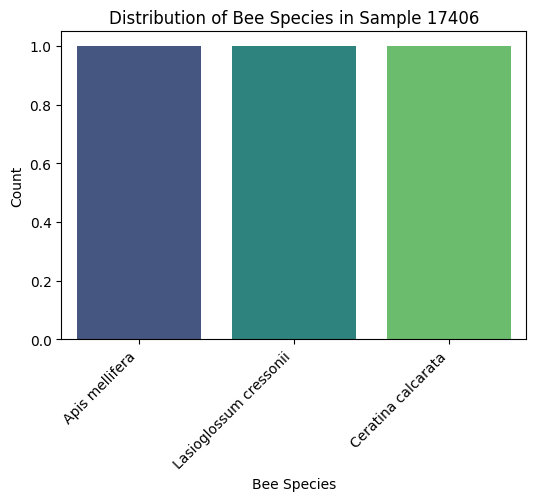

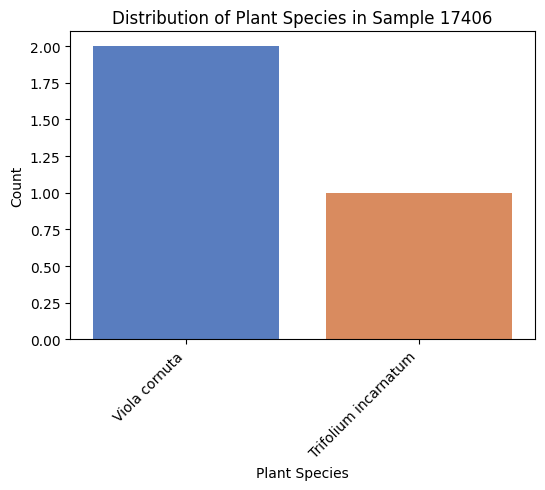

In [145]:
# Check if the selected sample is not empty
if not selected_sample.empty:
    # Plot the distribution of bee species
    plt.figure(figsize=(6, 4))
    sns.countplot(x='bee_species', data=selected_sample, palette='viridis', order=selected_sample['bee_species'].value_counts().index)
    plt.title(f'Distribution of Bee Species in Sample {sample_id_to_visualize}')
    plt.xlabel('Bee Species')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()

    # Plot the distribution of plant species
    plt.figure(figsize=(6, 4))
    sns.countplot(x='plant_species', data=selected_sample, palette='muted', order=selected_sample['plant_species'].value_counts().index)
    plt.title(f'Distribution of Plant Species in Sample {sample_id_to_visualize}')
    plt.xlabel('Plant Species')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()
else:
    print(f"No data found for sample {sample_id_to_visualize}.")

#### Challange 💪 04
- Select the top three plant species you would recommend to the agency to support native bees.


In [146]:
# Filter rows with native bees
native_bees_df = df[df['nonnative_bee'] == 0]

In [147]:
# Group by plant species and calculate the total count of native bees for each plant
native_bees_count = native_bees_df['plant_species'].value_counts()

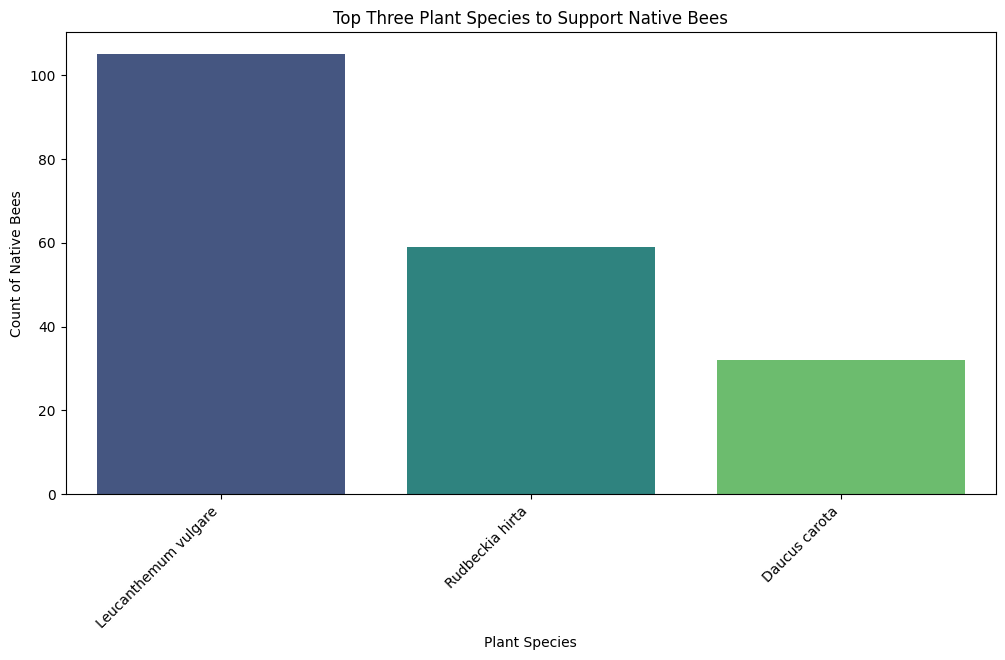

In [148]:
# Select the top three plant species
top_three_plants = native_bees_count.head(3)

# Plot the distribution of native bees across plant species
plt.figure(figsize=(12, 6))
sns.barplot(x=top_three_plants.index, y=top_three_plants.values, palette='viridis')
plt.title('Top Three Plant Species to Support Native Bees')
plt.xlabel('Plant Species')
plt.ylabel('Count of Native Bees')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [150]:
# Display the top three plant species
print("Top Three Plant Species to Support Native Bees:")
print(top_three_plants)

Top Three Plant Species to Support Native Bees:
Leucanthemum vulgare    105
Rudbeckia hirta          59
Daucus carota            32
Name: plant_species, dtype: int64


#### Challange 💪 05
#### A small conclusion with your recommendations.

So, the information we have helps us see what plants native bees like. But these suggestions should just be a beginning for more research and working together. The main aim is to create strong nature areas that actively help wild bees and add to the bigger plan of protecting many kinds of living things.